Analyzing renting Data

- How many rows and columns?
- What is the correlation between the variables and the price? (Why might that be?)
- How are variables correlated to each other? (Why?)
- Which variables have the greatest influence on the price?
- Which variables have the least influence on the price?
- How many qualitative and quantitative variables are there? How would you transform these values into numerical values?

Import libraries and establish df for rent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder

df_rent = pd.read_csv('df_cleaned_rent.csv')
df = pd.read_csv('DF_cleaned.csv')

df

,Unnamed: 0,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,...,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
0,2,https://www.immoweb.be/en/classified/apartment...,1,1,1969,Belgium,Brugge,0,NON_FLOOD_ZONE,0,...,1,0,GOOD,flat_studio,255,0,1,1,2,residential_sale
1,8,https://www.immoweb.be/en/classified/house/for...,2,4,2008,Belgium,Brugge,0,NON_FLOOD_ZONE,1,...,2,0,GOOD,house,0,0,0,2,1,residential_sale
2,10,https://www.immoweb.be/en/classified/house/for...,1,4,1971,Belgium,Veurne,0,NON_FLOOD_ZONE,0,...,2,0,TO_BE_DONE_UP,house,170,0,1,2,1,residential_sale
3,11,https://www.immoweb.be/en/classified/apartment...,0,2,1972,Belgium,Hasselt,0,NON_FLOOD_ZONE,0,...,1,0,AS_NEW,apartment,255,0,1,1,2,residential_sale
4,14,https://www.immoweb.be/en/classified/apartment...,1,1,1994,Belgium,Brussels,0,NON_FLOOD_ZONE,1,...,2,0,AS_NEW,apartment,255,0,1,1,2,residential_sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70962,181784,https://www.immoweb.be/en/classified/apartment...,1,1,1971,Belgium,Mouscron,0,NON_FLOOD_ZONE,0,...,2,1,GOOD,apartment,255,0,0,1,2,residential_monthly_rent
70963,181786,https://www.immoweb.be/en/classified/apartment...,1,1,2017,Belgium,Tongeren,0,NON_FLOOD_ZONE,0,...,2,0,GOOD,service_flat,255,0,1,1,2,residential_sale
70964,181789,https://www.immoweb.be/en/classified/house/for...,4,4,1971,Belgium,Antwerp,0,NON_FLOOD_ZONE,0,...,2,0,JUST_RENOVATED,apartment_block,202,0,0,1,1,residential_sale
70965,181790,https://www.immoweb.be/en/classified/apartment...,1,2,1971,Belgium,Antwerp,0,NON_FLOOD_ZONE,0,...,2,0,GOOD,apartment,255,0,1,1,2,residential_sale


In [2]:
df_rent.columns

Index(['BathroomCount', 'BedroomCount', 'ConstructionYear', 'District',
       'Fireplace', 'Garden', 'GardenArea', 'Kitchen', 'LivingArea',
       'Locality', 'MonthlyCharges', 'NumberOfFacades', 'PEB', 'PostalCode',
       'Price', 'PropertyId', 'Province', 'Region', 'RoomCount', 'ShowerCount',
       'StateOfBuilding', 'SubtypeOfProperty', 'SurfaceOfPlot', 'SwimmingPool',
       'Terrace', 'ToiletCount', 'TypeOfSale'],
      dtype='object')

Monthly charge distribution

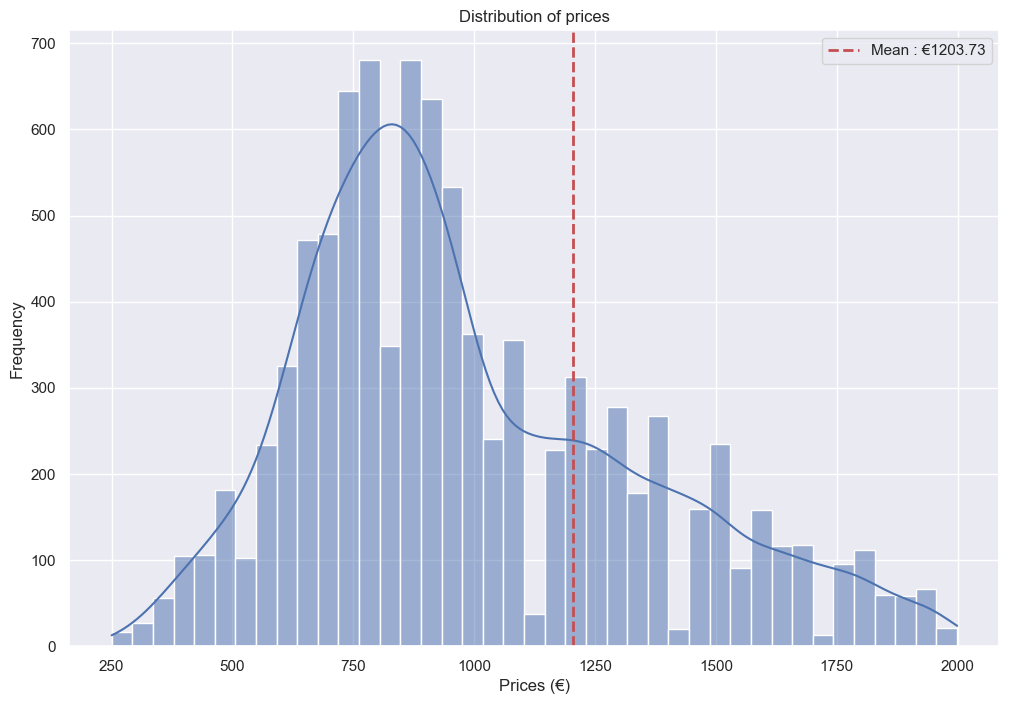

In [8]:
import seaborn as sns
df_average_price = df_rent['Price'].mean()
#df[''] < 800000

df_filtered = df_rent[df_rent['Price'] < 2000]

#df_average_price = df_filtered[''].mean()
sns.set_theme()
plt.figure(figsize=(12, 8))
sns.histplot(df_filtered['Price'], kde=True) 
plt.title('Distribution of prices')
plt.xlabel('Prices (€)')
plt.ylabel('Frequency')
plt.axvline(df_average_price, color='r', linestyle='--', linewidth=2, label=f'Mean : €{df_average_price:.2f}')  
plt.legend()
plt.show()

Living area distribution

C:\Users\pieta\AppData\Local\Temp\ipykernel_23676\2656608346.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_filtered['LivingArea'], kde=True, bins=30, palette='Blues_d')


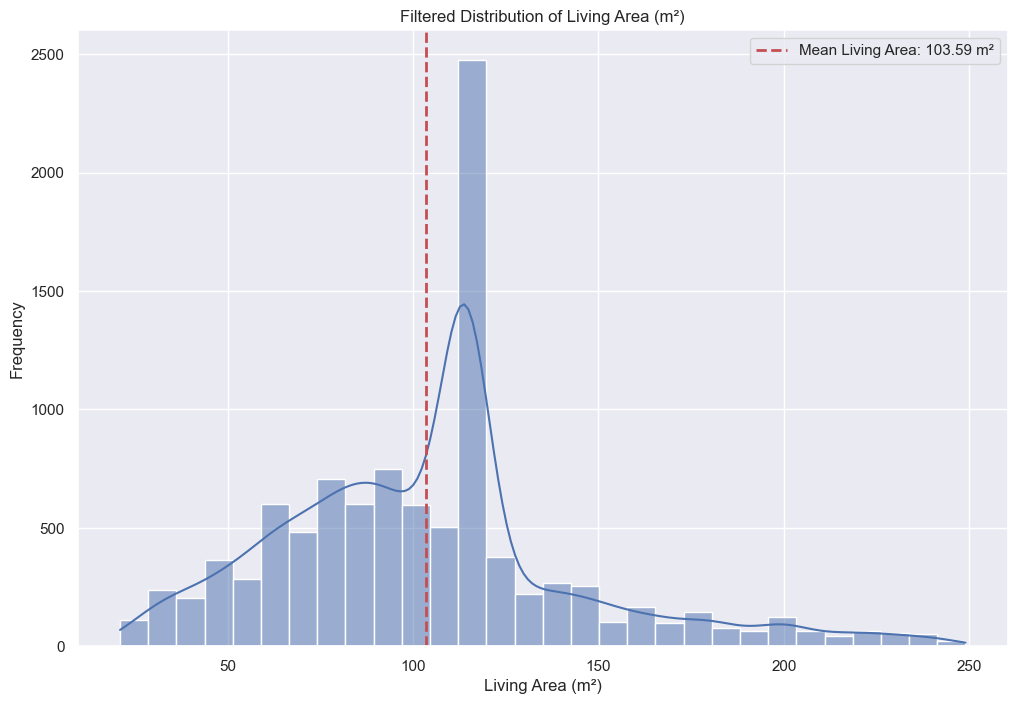

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df_filtered = df_rent[(df_rent['LivingArea'] < 250) & (df_rent['LivingArea'] > 20)]  

df_average_Area = df_filtered['LivingArea'].mean()

plt.figure(figsize=(12, 8))
sns.histplot(df_filtered['LivingArea'], kde=True, bins=30, palette='Blues_d')
plt.title('Filtered Distribution of Living Area (m²)')
plt.xlabel('Living Area (m²)')
plt.ylabel('Frequency')
plt.axvline(df_average_Area, color='r', linestyle='--', linewidth=2, label=f'Mean Living Area: {df_average_Area:.2f} m²')
plt.legend()
plt.show()

Year of construction distribution 


C:\Users\pieta\AppData\Local\Temp\ipykernel_23676\2802356729.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_contruct_year['Decade'] = (df_price_contruct_year['ConstructionYear'] // 10) * 10


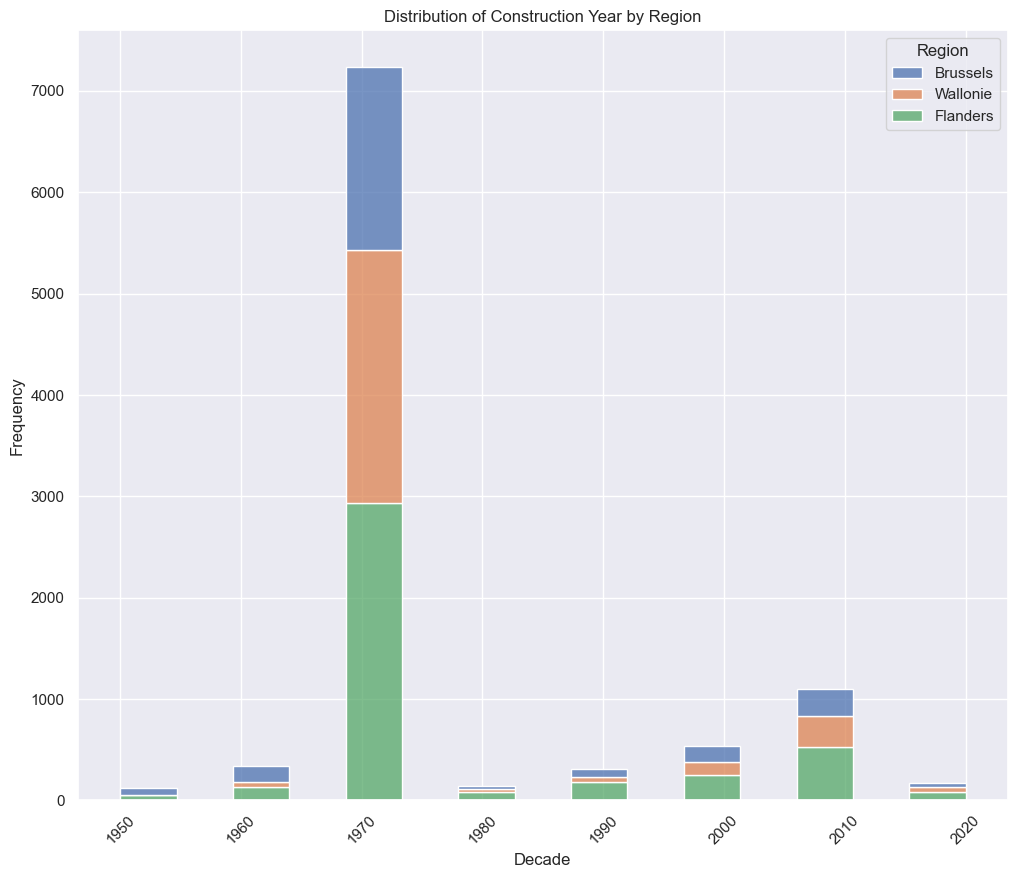

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('df_cleaned_rent.csv')


df_price_contruct_year = df[(df['ConstructionYear'] > 1950)]


df_price_contruct_year['Decade'] = (df_price_contruct_year['ConstructionYear'] // 10) * 10


plt.figure(figsize=(12, 10))
sns.histplot(df_price_contruct_year, x='Decade', hue='Region', kde=False,  multiple='stack')
plt.title('Distribution of Construction Year by Region')
plt.xlabel('Decade')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Lets analyze some correlations with the rent price

- year of construction
- region
- type of property
- room count
- state of building


Relationship between Median Price and Region

C:\Users\pieta\AppData\Local\Temp\ipykernel_23676\854586701.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Decade'] = (df_filtered['ConstructionYear'] // 10) * 10
C:\Users\pieta\AppData\Local\Temp\ipykernel_23676\854586701.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_agg, x='Decade', y='Price',  palette='Blues_d')


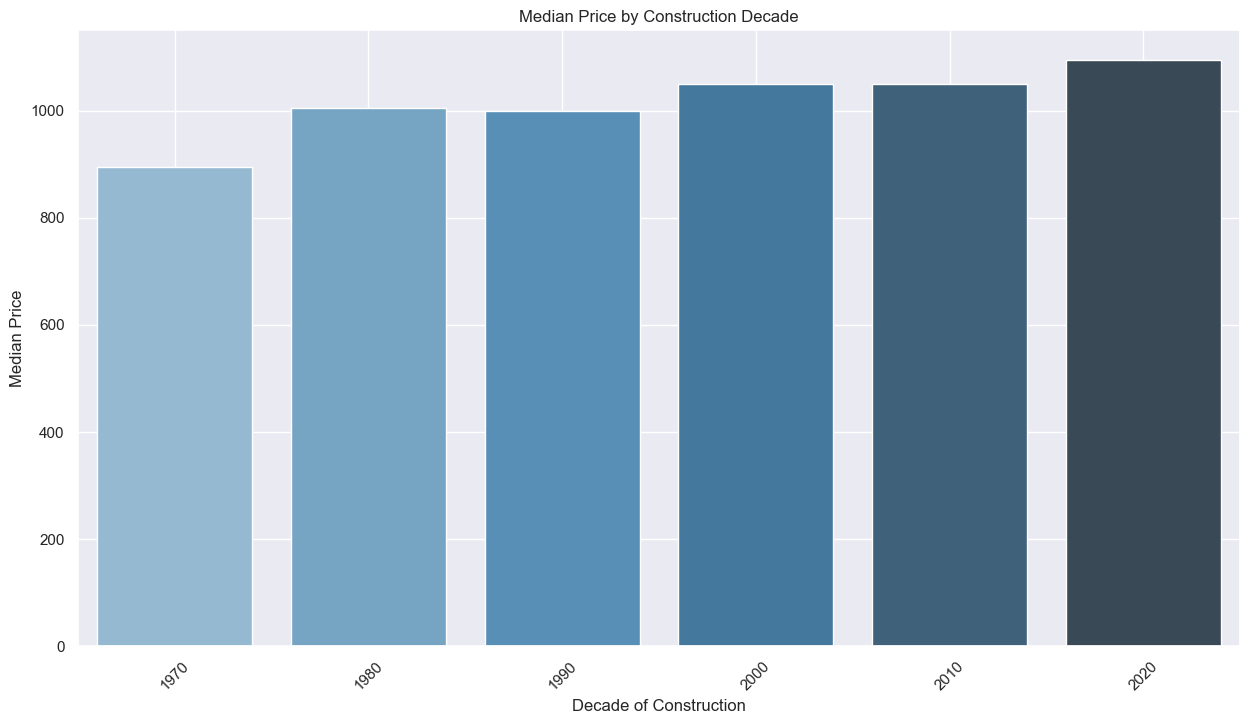

Correlation between Price and ConstructionYear:
                      Price  ConstructionYear
Price             1.000000         -0.079697
ConstructionYear -0.079697          1.000000


In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('df_cleaned_rent.csv')


df_filtered = df[(df['ConstructionYear'] > 1970)]


df_filtered['Decade'] = (df_filtered['ConstructionYear'] // 10) * 10


data_agg = df_filtered.groupby('Decade')['Price'].median().reset_index()


plt.figure(figsize=(15, 8))
sns.barplot(data=data_agg, x='Decade', y='Price',  palette='Blues_d')
plt.title('Median Price by Construction Decade')
plt.xlabel('Decade of Construction')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()




correlation = df[['Price', 'ConstructionYear']].corr()
print("Correlation between Price and ConstructionYear:\n", correlation)


Relationship between Price and Type of Property

C:\Users\pieta\AppData\Local\Temp\ipykernel_23676\3810627723.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_price_region, x='Region', y='Price', palette='Blues_d')


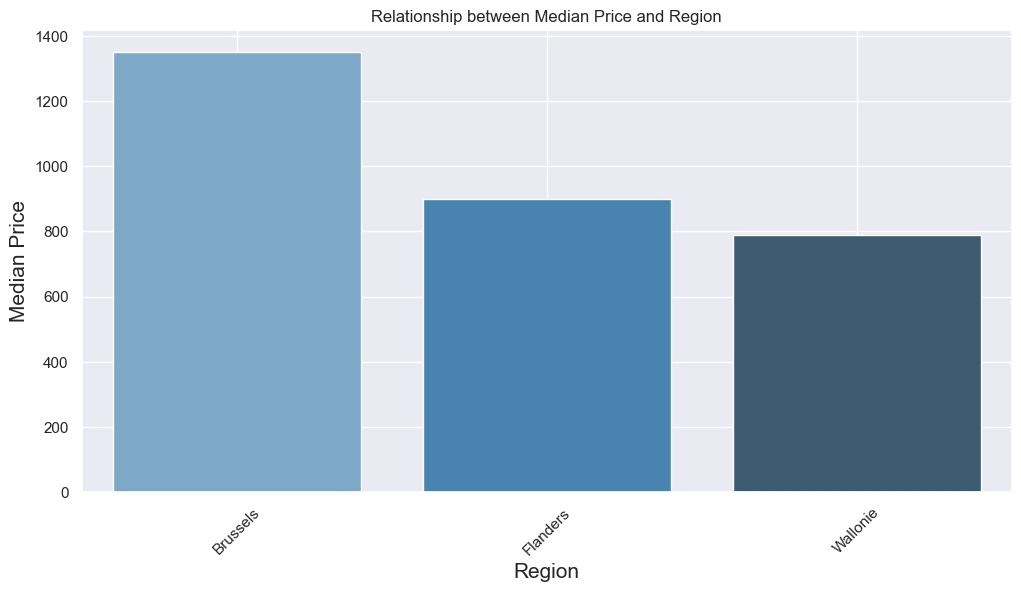

,Price,Region_encoded
Price,1.000000,-0.104148
Region_encoded,-0.104148,1.000000


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('df_cleaned_rent.csv')

df_filtered = df[(df['Price'] < 3000) &
                 (df['Price'] != 0)]

df_price_region = df_filtered.groupby('Region')['Price'].median().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_price_region, x='Region', y='Price', palette='Blues_d')
plt.title('Relationship between Median Price and Region')
plt.xlabel('Region', fontsize=15)
plt.ylabel('Median Price', fontsize=15)
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()


from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('DF_cleaned.csv')


property_map = {
    1: 'Brussel',
    2: 'Flanders',
    3: 'Wallonie'
}


df['Region'] = df['Region'].replace(property_map)


le = LabelEncoder()
df['Region_encoded'] = le.fit_transform(df['Region'])


df[['Price', 'Region_encoded']].corr()

Relationship between Price and Subtype of Property

C:\Users\pieta\AppData\Local\Temp\ipykernel_23676\3357966494.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_filtered['TypeOfProperty'] = df_price_filtered['SubtypeOfProperty'].replace(property_map)
C:\Users\pieta\AppData\Local\Temp\ipykernel_23676\3357966494.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_price_filtered, x='SubtypeOfProperty', y='Price',palette='Blues_d')


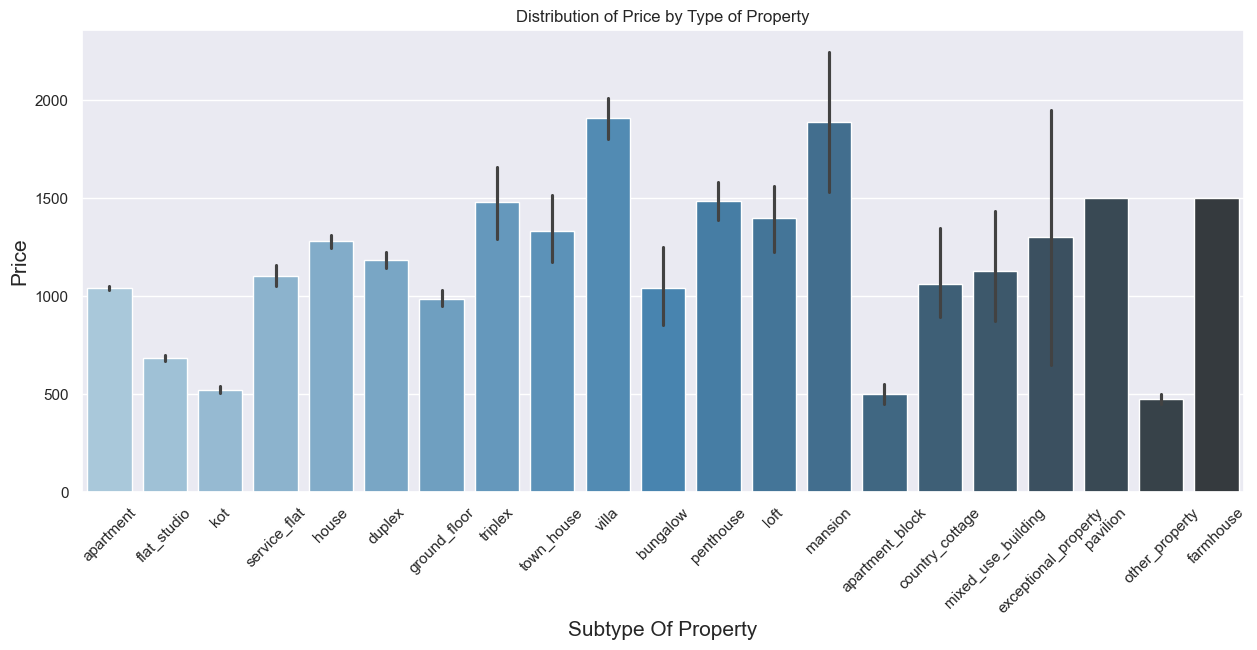

In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('DF_cleaned_rent.csv')


df_price_filtered = df[(df['ConstructionYear'] > 1970) & 
                       (df['Price'] < 3000)]



property_map = {1: 'Houses', 2: 'Apartments'}


df_price_filtered['TypeOfProperty'] = df_price_filtered['SubtypeOfProperty'].replace(property_map)

sns.color_palette()
plt.figure(figsize=(15, 6))
sns.barplot(data=df_price_filtered, x='SubtypeOfProperty', y='Price',palette='Blues_d')
plt.title('Distribution of Price by Type of Property')
plt.xlabel('Subtype Of Property', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(rotation=45)
plt.show()


#df[['Price', 'SubtypeOfProperty']].corr(method='spearman')

Relationship between Price and Living Area

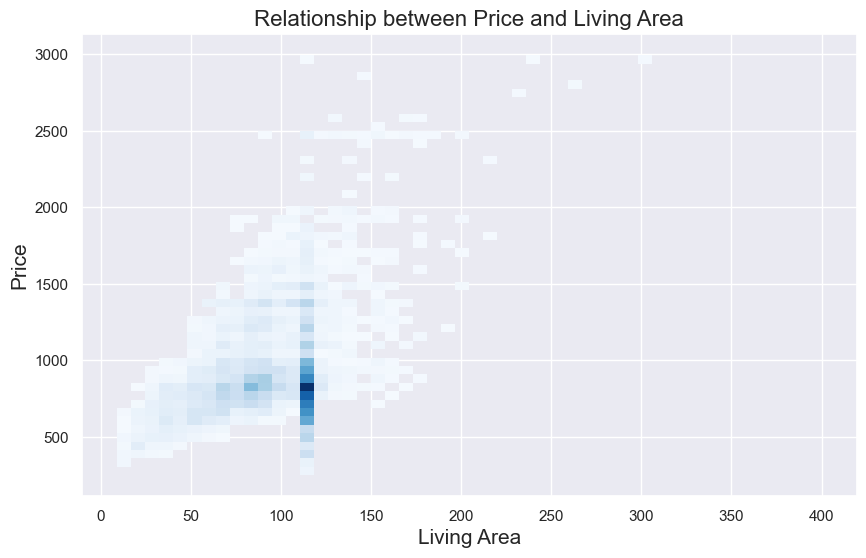

,Price,LivingArea
Price,1.000000,0.623746
LivingArea,0.623746,1.000000


In [27]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('df_cleaned_rent.csv')


df_price_filtered = df[
                       (df['Price'] < 3000) &

                       (df['Price'] != 0)]

plt.figure(figsize=(10, 6))
sns.histplot(data=df_price_filtered, x='LivingArea', y='Price', bins=50, pthresh=0.1, cmap='Blues')
plt.title('Relationship between Price and Living Area', fontsize=16)
plt.xlabel('Living Area', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()

df[['Price', 'LivingArea']].corr()

Relationship between Price and State of Building

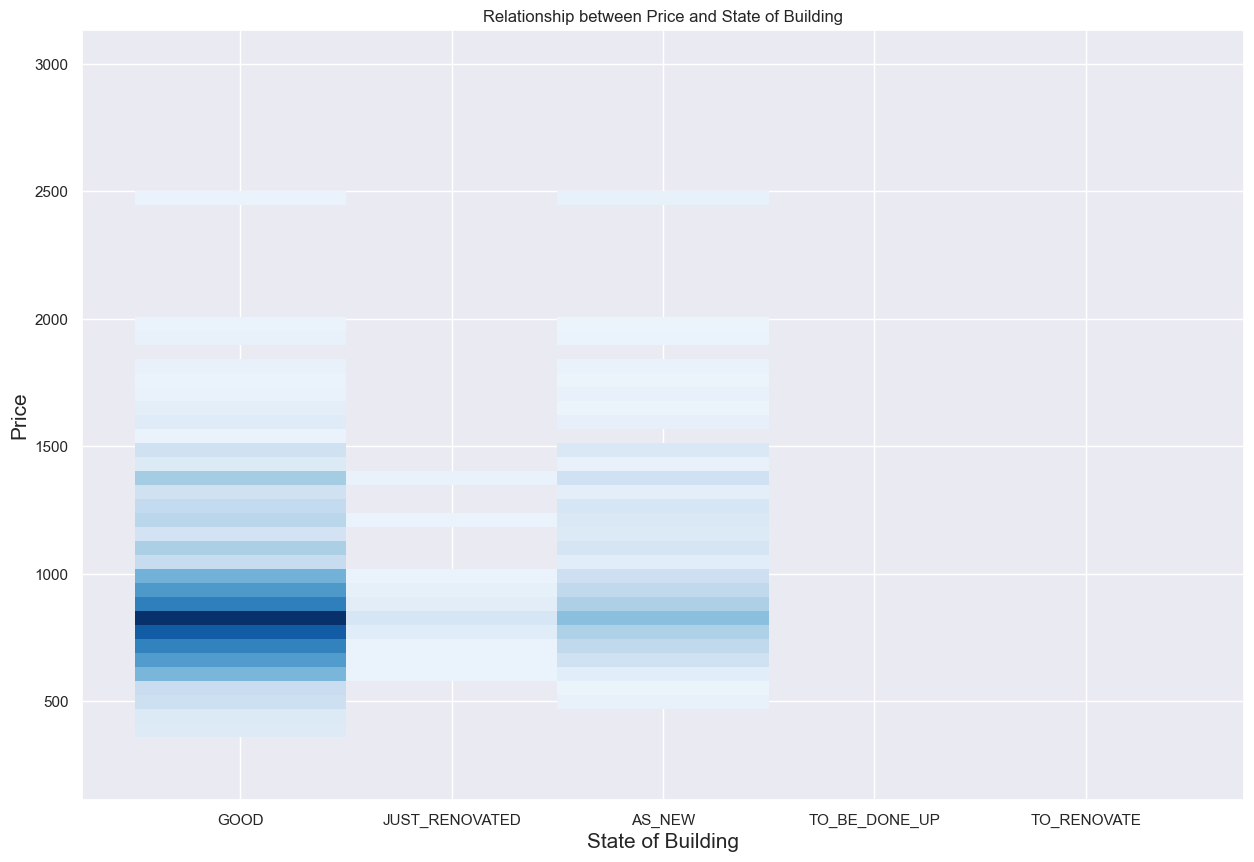

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('df_cleaned_rent.csv')

df_price_filtered = df[(df['ConstructionYear'] > 1950) & 
                       (df['Price'] < 3000) & 

                       (df['Price'] != 0)]

plt.figure(figsize=(15, 10))
sns.histplot(data=df_price_filtered,x='StateOfBuilding', y='Price', bins=50, pthresh=0.1, cmap='Blues')
plt.title('Relationship between Price and State of Building')
plt.xlabel('State of Building',fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()